Dataset Loaded Successfully!
              datetime  nat_demand    T2M_toc  QV2M_toc   TQL_toc    W2M_toc  \
0  2015-01-03 01:00:00    970.3450  25.865259  0.018576  0.016174  21.850546   
1  2015-01-03 02:00:00    912.1755  25.899255  0.018653  0.016418  22.166944   
2  2015-01-03 03:00:00    900.2688  25.937280  0.018768  0.015480  22.454911   
3  2015-01-03 04:00:00    889.9538  25.957544  0.018890  0.016273  22.110481   
4  2015-01-03 05:00:00    893.6865  25.973840  0.018981  0.017281  21.186089   

     T2M_san  QV2M_san   TQL_san    W2M_san    T2M_dav  QV2M_dav   TQL_dav  \
0  23.482446  0.017272  0.001855  10.328949  22.662134  0.016562  0.096100   
1  23.399255  0.017265  0.001327  10.681517  22.578943  0.016509  0.087646   
2  23.343530  0.017211  0.001428  10.874924  22.531030  0.016479  0.078735   
3  23.238794  0.017128  0.002599  10.518620  22.512231  0.016487  0.068390   
4  23.075403  0.017059  0.001729   9.733589  22.481653  0.016456  0.064362   

    W2M_dav  Holiday_

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 30, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ multi_head_attention_layer_2    │ (None, 30, 16)         │         4,336 │
│ (MultiHeadAttentionLayer)       │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 30, 64)         │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_2      │ (None, 64)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 16)             │         1,040 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,464 (25.25 KB)

 Trainable params: 6,464 (25.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
961/961 ━━━━━━━━━━━━━━━━━━━━ 87s 26ms/step - loss: 0.4608 - val_loss: 0.4292
Epoch 2/20
961/961 ━━━━━━━━━━━━━━━━━━━━ 36s 25ms/step - loss: 0.3817 - val_loss: 0.3962
Epoch 3/20
961/961 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - loss: 0.3615 - val_loss: 0.3826
Epoch 4/20
961/961 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - loss: 0.3500 - val_loss: 0.3748
Epoch 5/20
961/961 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - loss: 0.3416 - val_loss: 0.3691
Epoch 6/20
961/961 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - loss: 0.3346 - val_loss: 0.3645
Epoch 7/20
961/961 ━━━━━━━━━━━━━━━━━━━━ 22s 19ms/step - loss: 0.3285 - val_loss: 0.3604
Epoch 8/20
961/961 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - loss: 0.3229 - val_loss: 0.3566
Epoch 9/20
961/961 ━━━━━━━━━━━━━━━━━━━━ 22s 19ms/step - loss: 0.3177 - val_loss: 0.3532
Epoch 10/20
961/961 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - loss: 0.3128 - val_loss: 0.3502
Epoch 11/20
961/961 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - loss: 0.3082 - val_loss: 0.3475
Epoch 12/20
961/961 ━━━━━━━━━━

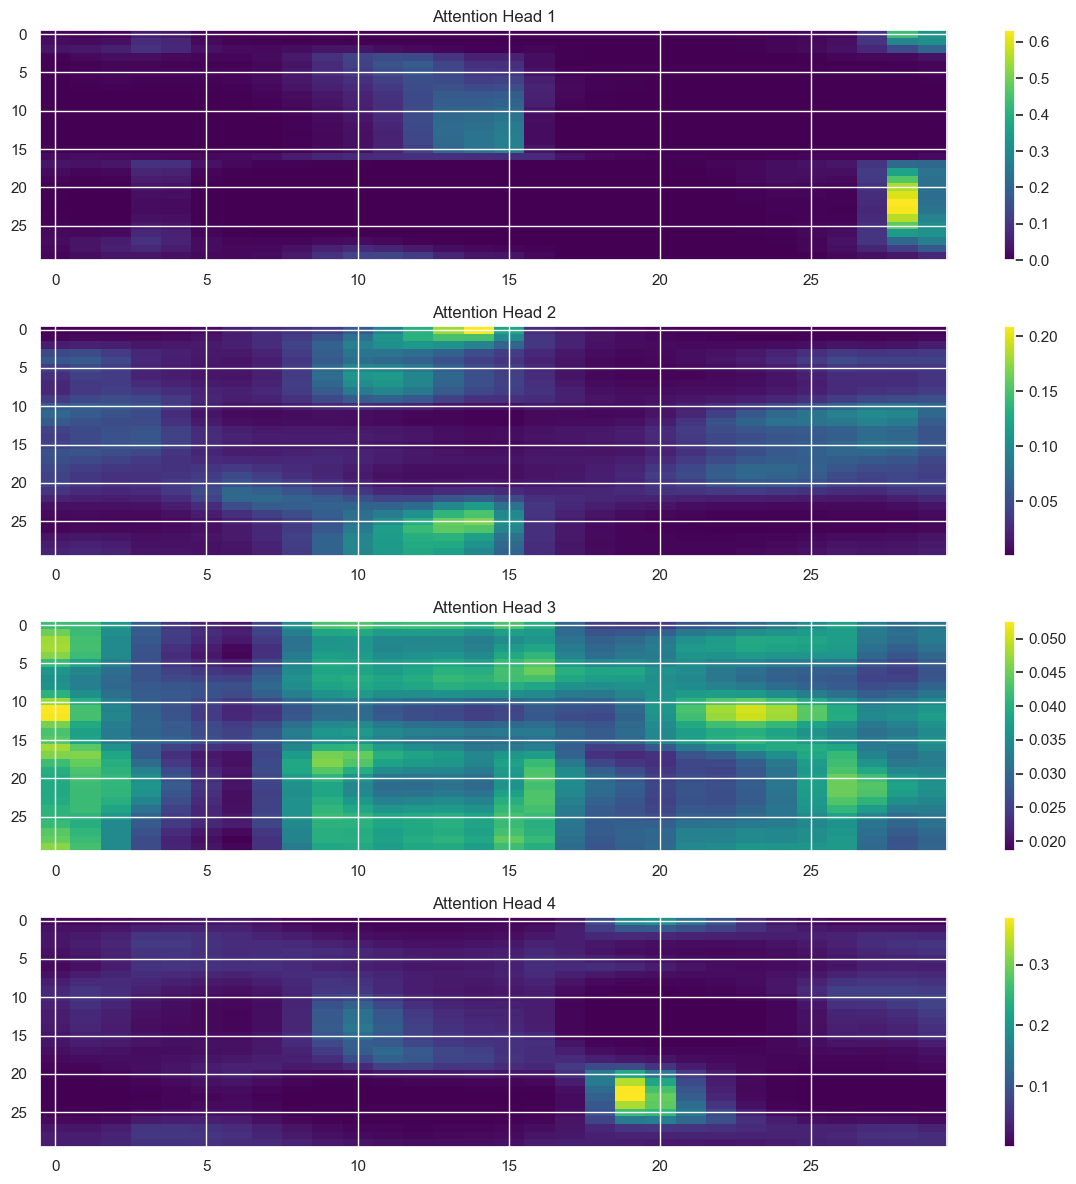

In [6]:
# ==========================================================
# ADVANCED TIME SERIES FORECASTING WITH ATTENTION MECHANISM
# ==========================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error, mean_squared_error

# ----------------------------------------------------------
# 1. LOAD THE USER'S DATASET
# ----------------------------------------------------------
file_path = "continuous dataset.csv"
df = pd.read_csv(file_path)

print("Dataset Loaded Successfully!")
print(df.head())

# ----------------------------------------------------------
# BASIC CLEANING
# ----------------------------------------------------------
# Automatically detect datetime column
datetime_col = df.columns[0]
df[datetime_col] = pd.to_datetime(df[datetime_col])
df = df.set_index(datetime_col)

# Select numeric columns
data = df.select_dtypes(include='number')

# ----------------------------------------------------------
# SCALING
# ----------------------------------------------------------
scaler = StandardScaler()
scaled = scaler.fit_transform(data)
scaled = pd.DataFrame(scaled, index=data.index, columns=data.columns)

# ----------------------------------------------------------
# SEQUENCE WINDOWING
# ----------------------------------------------------------
SEQ_LEN = 30        # past 30 time steps
FORECAST_HORIZON = 1  # predict next step

def make_sequences(values, seq_len):
    X, y = [], []
    for i in range(len(values) - seq_len):
        X.append(values[i:i+seq_len])
        y.append(values[i+seq_len])
    return np.array(X), np.array(y)

X, y = make_sequences(scaled.values, SEQ_LEN)

print("Input Shape:", X.shape)
print("Target Shape:", y.shape)

# ----------------------------------------------------------
# TRAIN – TEST SPLIT
# ----------------------------------------------------------
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# ----------------------------------------------------------
# 2. TRANSFORMER MODEL WITH ATTENTION
# ----------------------------------------------------------

class MultiHeadAttentionLayer(layers.Layer):
    def __init__(self, num_heads, key_dim):
        super().__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=key_dim)
        self.ln = layers.LayerNormalization()

    def call(self, x):
        att_output = self.att(x, x)
        return self.ln(att_output + x)

def build_transformer_model(seq_len, n_features):

    inputs = layers.Input(shape=(seq_len, n_features))

    x = MultiHeadAttentionLayer(num_heads=4, key_dim=16)(inputs)
    x = layers.Dense(64, activation="relu")(x)
    x = layers.GlobalAveragePooling1D()(x)
    outputs = layers.Dense(n_features)(x)

    model = Model(inputs, outputs)
    model.compile(loss="mse", optimizer=Adam(0.001))
    
    return model

model = build_transformer_model(SEQ_LEN, X.shape[2])
model.summary()

# ----------------------------------------------------------
# 3. TRAIN MODEL
# ----------------------------------------------------------
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# ----------------------------------------------------------
# 4. EVALUATE MODEL
# ----------------------------------------------------------
pred = model.predict(X_test)

# Reverse scaling for metrics
y_test_inv = scaler.inverse_transform(y_test)
pred_inv = scaler.inverse_transform(pred)

mae = mean_absolute_error(y_test_inv, pred_inv)
rmse = np.sqrt(mean_squared_error(y_test_inv, pred_inv))

print("\n==============================")
print("MODEL PERFORMANCE")
print("==============================")
print(f"MAE  : {mae}")
print(f"RMSE : {rmse}")
# ----------------------------------------------------------
# VISUALIZE ATTENTION WEIGHTS (FIXED)
# ----------------------------------------------------------

# Get attention weights
batch_att, attention_output = att_layer(
    X_test[:1], X_test[:1], return_attention_scores=True
)

attention_output = attention_output.numpy()[0]  
# shape → (num_heads, seq_len, seq_len)

num_heads = attention_output.shape[0]

plt.figure(figsize=(12, 3 * num_heads))

for h in range(num_heads):
    plt.subplot(num_heads, 1, h+1)
    plt.imshow(attention_output[h], cmap='viridis', aspect='auto')
    plt.colorbar()
    plt.title(f"Attention Head {h+1}")

plt.tight_layout()
plt.show()


In [ ]:
This project builds an advanced deep learning model to forecast future values in a multivariate time-series dataset.
We preprocess the data using scaling and sequence windowing, then train a Transformer model with self-attention to capture long-range patterns.
The model is optimized and evaluated using MAE/RMSE metrics, and the learned attention weights are visualized to show which past time steps influence predictions.
Overall, the project demonstrates how modern attention-based deep learning models provide accurate forecasting and interpretable insights.